# Notebook 2: Layer 2
Shannon Wietsma - S4147472

In [124]:
# Pip install packages

#%pip install pandas
#%pip install itertools
#%pip install regex
#%pip install matplotlib
#%pip install openpyxl
#%pip install emoji

In [125]:
# Install packages

import pandas as pd
import itertools
import regex as re
import matplotlib.pyplot as plt
import emoji

In [126]:
# Loading the file
corpus_analysis = pd.read_csv("clean_corpus.csv", sep = ',', encoding = 'utf8')
corpus_analysis

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,response_id,response,blog_name_response,type_of_response,reblog_parent_name
0,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r001,"What, no golden offset spatula?",twelve-badgers-in-a-suit,reply,NaN
1,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r002,Time to pull out grandma's cookbook. Poor devil won't know what hit him til he tastes it,mimic-time,reply,NaN
2,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r003,He's going to have to offer me more than something I already have.,schrodingersdate,reply,NaN
3,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r004,As one day of appraisal turned into a month.. You wondered when the devil will pass his judgement..so one day you decided to settle the matters right….but only to…...what did you see???,inlovewithtokyorevengers,reply,NaN
4,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, a

In [127]:
corpus_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   blog_name           2099 non-null   object
 1   title               2099 non-null   object
 2   description         2099 non-null   object
 3   post_url            2099 non-null   object
 4   date (YYYY-MM-DD)   2099 non-null   object
 5   hashtags            1781 non-null   object
 6   short_url           2099 non-null   object
 7   writing_prompt_id   2099 non-null   object
 8   writing_prompt      2099 non-null   object
 9   total_amount_notes  2099 non-null   int64 
 10  response_id         2099 non-null   object
 11  response            2069 non-null   object
 12  blog_name_response  2070 non-null   object
 13  type_of_response    2069 non-null   object
 14  reblog_parent_name  1515 non-null   object
dtypes: int64(1), object(14)
memory usage: 246.1+ KB


In [128]:
# identify duplicates based on writing_prompt column
duplicates = corpus_analysis.duplicated(subset=['writing_prompt'])

# select rows that are not duplicates
unique_writing_prompts = corpus_analysis[~duplicates]

# print unique writing prompts
unique_writing_prompts

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,response_id,response,blog_name_response,type_of_response,reblog_parent_name
0,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r001,"What, no golden offset spatula?",twelve-badgers-in-a-suit,reply,NaN
20,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711804624692281345/the-vampire-steps-out-and-his-daughters-cower-and,14-3-2023,"['writers', 'writers on tumblr', 'writing prompts', 'writeblr', 'writing inspiration']",https://tmblr.co/ZCDX7hdWreZiGu01,wp002,"<p>The vampire steps out, and his daughters cower and kneel where they stand. You ready yourself for the fight. Before you can raise your weapon, though, the vampire sighs, and with an embarrassed tone, says, “I’m really quite sorry for the trouble…”</p>",3667,wp002r001,And stealing this concept for a D&D one-shot xd,eziocauthon89,reply,NaN
40,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711799357025009664/human-society-has-collapsed-since-the-vanishings,14-3-2023,"['writers', 'writers on tumblr', 'writing prompts', 'writeblr', 'writing inspiration']",https://tmblr.co/ZCDX7hdWqRvoqy00,wp003,"<p>Human society has collapsed since the vanishings began. Anyone left alone, unseen or untouched by another person, stops existing. Those who remain now survive as herds, sleeping in huddled masses and always touching in some way while awake.</p>",3512,wp003r001,"So, there goes all the introverts…",therealyumistar,reply,NaN
60,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711794066287886336/as-a-retired-supervillian-youve-not-been-bothered',14-3-2023,"['writers', 'writers on tumblr', 'writing prompts', 'writeblr', 'writing inspiration']",https://tmblr.co/ZCDX7hdWpEwQKW00,wp004,"<p>As a retired supervillian you’ve not been bothered very much. One day a henchman who once worked under you knocks on your door, along with the old sidekick of your archnemisis. They’re in hiding from the hero and need your help.</p>",4787,wp004r001,my first thought was dannyphantom.exce on tiktok,icecream-sandwich,reply,NaN
80,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711788772836130816/youve-just-created-a-handheld-device-that-lets,14-3-2023,"['writers', 'writers on tumblr', 'writing prompts', 'writeblr', 'writing inspiration']",https://tmblr.co/ZCDX7hdWo1uW0a00,wp005,"<p>You’ve just created a handheld device that lets you slip into the interdimensional space between space and time. While there, you don’t age and, don’t experience time dilation and can travel long distances instantly. So, since you’re a very smart an imaginative person, you use it to sleep.</p>",5634,wp005r001,literally me,huntressofartemis001,reply,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,promptsforthestrugglingauthor,Writing Prompts Daily,"<a href=https://promptsforthestr

In [129]:
unique_writing_prompts.columns

Index(['blog_name', 'title', 'description', 'post_url', 'date (YYYY-MM-DD)',
       'hashtags', 'short_url', 'writing_prompt_id', 'writing_prompt',
       'total_amount_notes', 'response_id', 'response', 'blog_name_response',
       'type_of_response', 'reblog_parent_name'],
      dtype='object')

# Merge unique_writing_prompts with analysis_for_layer_2_to_be_added

In [130]:
analysis_for_layer_2_to_be_added_df = pd.read_csv('analysis_for_layer_2_to_be_added.csv')
analysis_for_layer_2_to_be_added_df.columns

Index(['Unnamed: 0', 'writing_prompt_id', 'reblog', 'submission',
       'original content', 'structure'],
      dtype='object')

In [131]:
analysis_for_layer_2_to_be_added_df = analysis_for_layer_2_to_be_added_df.drop('Unnamed: 0', axis = 1)
analysis_for_layer_2_to_be_added_df

,writing_prompt_id,reblog,submission,original content,structure
0,wp001,no,no,yes,<p></p>
1,wp002,no,no,yes,<p></p>
2,wp003,no,no,yes,<p></p>
3,wp004,no,no,yes,<p></p>
4,wp005,no,no,yes,<p></p>
...,...,...,...,...,...
214,wp246,no,no,yes,<p><h1>Writing Prompt #XXX</h1></p><p></p>
215,wp247,yes,no,no,self-reblog of wp248
216,wp248,no,no,yes,<p><h1>Writing Prompt #XXX</h1></p><p></p>
217,wp249,yes,no,no,self-reblog of wp250


In [132]:
unique_writing_prompts = pd.merge(unique_writing_prompts, analysis_for_layer_2_to_be_added_df, on = 'writing_prompt_id', how = 'inner')
unique_writing_prompts['writing_prompt_id']

0      wp001
1      wp002
2      wp003
3      wp004
4      wp005
       ...  
205    wp246
206    wp247
207    wp248
208    wp249
209    wp250
Name: writing_prompt_id, Length: 210, dtype: object

## Question 1: What type of content is used to frame the writing prompt?

In [133]:
def classify_prompt(prompt):
    # initialize an empty list as prompt_type
    prompt_type = []
    # Check if prompt contains numerical values
    if isinstance(prompt, float):
        prompt_type.append('numeric')
    # Check if prompt contains text
    elif isinstance(prompt, str):
        # To check for text
        if '<p>' in prompt:
            prompt_type.append('text')
        # To check for images
        if re.search(r'(http|https)://[^\s]+\.(jpg|jpeg|png)', prompt):
            prompt_type.append('image')
        # To check for GIFs
        if re.search(r'(http|https)://[^\s]+\.(gif)', prompt):
            prompt_type.append('GIF')
        # To check for 'Keep reading'
        if 'Keep reading' in prompt:
            prompt_type.append('read-more link')
        # To check for links, different types
        link_pattern = r'(http|https)://[^\s]+'
        if re.search(link_pattern, prompt):
            link_type = classify_link(prompt)
            if link_type: 
                prompt_type.append(link_type)
            else: 
                prompt_type.append('link')
        # To check for polls
        if 'poll' in prompt:
            prompt_type.append('poll')
        # To check for reblogs
        if 'blockquote' in prompt:
            prompt_type.append('reblog')
    return prompt_type

def classify_link(link):
    # Check if link is audio
    if re.search(r'(http|https)://[^\s]+(\.mp3|\.m4a|\.flac|\.mp4|\.wav|\.wma|\.aac)', link):
        return 'audio link'
    # Check if link is a video
    if re.search(r'(http|https)://[^\s]+(\.mp4|\.mov|\.avi|\.wmv|\.flv)', link):
        return 'video link'
  

In [134]:
unique_writing_prompts['prompt_type'] = unique_writing_prompts['writing_prompt'].apply(classify_prompt)
unique_writing_prompts['prompt_type']

0                    [text]
1                    [text]
2                    [text]
3                    [text]
4                    [text]
               ...         
205                  [text]
206    [text, link, reblog]
207                  [text]
208    [text, link, reblog]
209                  [text]
Name: prompt_type, Length: 210, dtype: object

In [135]:
#Apply the function to corpus_analysis too
corpus_analysis['prompt_type'] = corpus_analysis['writing_prompt'].apply(classify_prompt)

In [136]:
# hashtags are also part of it: 
unique_writing_prompts['hashtags'].isna().sum()

28

In [137]:
unique_writing_prompts['prompt_type'].value_counts()

prompt_type
[text]                         165
[text, link, reblog]            26
[text, link]                    13
[]                               2
[text, image, link, reblog]      2
[text, image, link]              1
[text, image, link, poll]        1
Name: count, dtype: int64

In [138]:
# Flatten the lists in the 'prompt_type' column
flatten_prompt_types = list(itertools.chain.from_iterable(unique_writing_prompts['prompt_type']))

# Calculate the value counts of each prompt type
prompt_counts = pd.Series(flatten_prompt_types).value_counts()

# Convert the series to a DataFrame for better formatting
response_freq_table = pd.DataFrame({'Prompt Type': prompt_counts.index, 'Count': prompt_counts.values})

# Display the frequency table
print(response_freq_table)

  Prompt Type  Count
0        text    208
1        link     43
2      reblog     28
3       image      4
4        poll      1


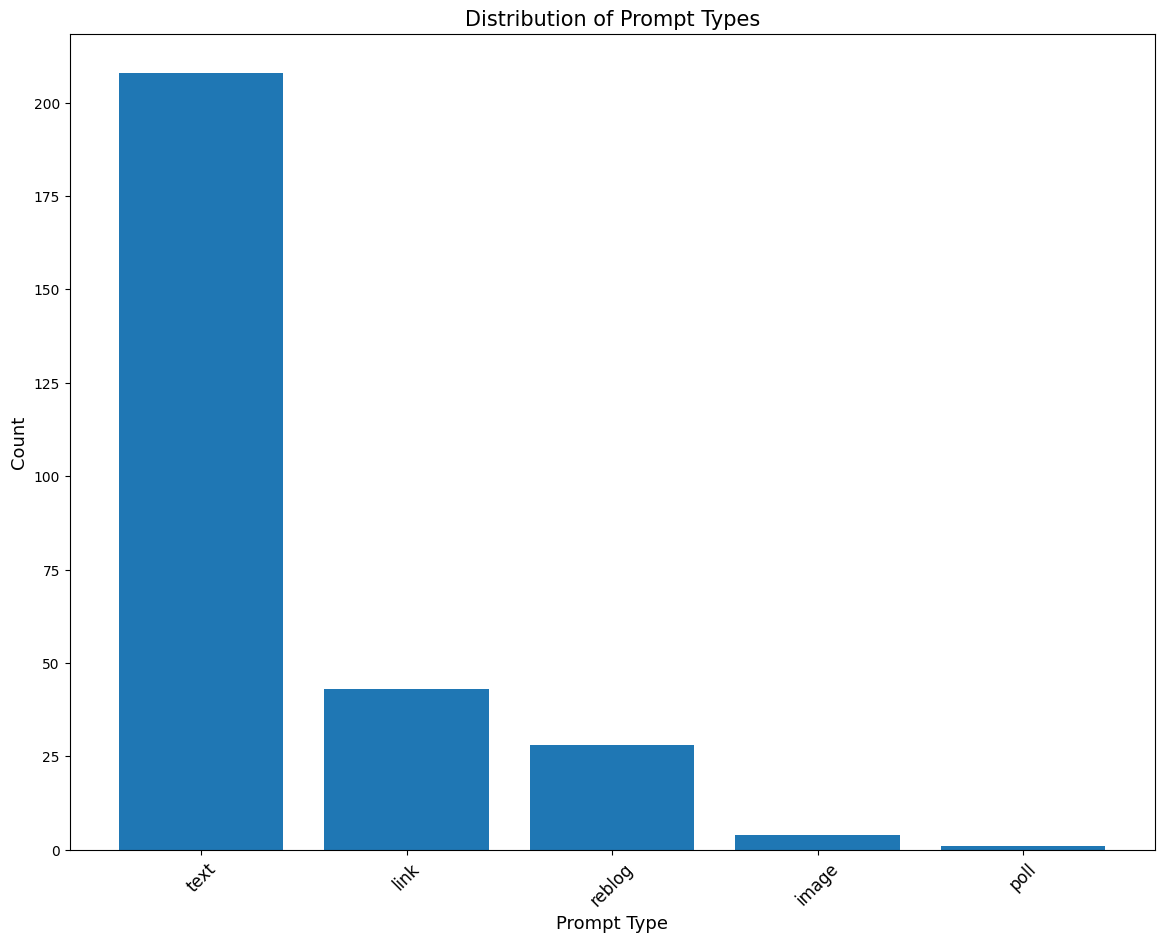

In [156]:
# Increase the figure size
plt.figure(figsize=(14, 12))  # Adjust the width and height as needed

# Create a bar plot
plt.bar(prompt_counts.index, prompt_counts.values)


# Add labels and title
plt.xlabel('Prompt Type', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Distribution of Prompt Types', fontsize = 15)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Increase fontsize for x-axis tick labels
plt.tick_params(axis='x', labelsize=12)  # Increase fontsize for x-axis tick labels

# Adjust the bottom margin to accommodate the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()

## Question 2: What type of content is used to respond to the writing prompt?

In [140]:
# First, classify whether it is a reblog or a reply
corpus_analysis['type_of_response'].value_counts()

type_of_response
reblog    1514
reply      555
Name: count, dtype: int64

In [141]:
def classify_response(response):
    response_type = []
    # Check if response contains numerical values
    if isinstance(response, float):
        response_type.append('numeric')
    # Check if response contains text
    elif isinstance(response, str):
        if any(char in emoji.EMOJI_DATA for char in response):
            response_type.append('emoji')
        if '#' in response:
            response_type.append('hashtags')
        if '@' in response:
            response_type.append('user mention')
        if re.search(r'(http|https)://[^\s]+', response):
            response_type.append('link')
        else: response_type.append('text')
    return response_type



In [142]:
corpus_analysis['response_type'] = corpus_analysis['response'].apply(classify_response)
corpus_analysis

,blog_name,title,description,post_url,date (YYYY-MM-DD),hashtags,short_url,writing_prompt_id,writing_prompt,total_amount_notes,response_id,response,blog_name_response,type_of_response,reblog_parent_name,prompt_type,response_type
0,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r001,"What, no golden offset spatula?",twelve-badgers-in-a-suit,reply,NaN,[text],[text]
1,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r002,Time to pull out grandma's cookbook. Poor devil won't know what hit him til he tastes it,mimic-time,reply,NaN,[text],[text]
2,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r003,He's going to have to offer me more than something I already have.,schrodingersdate,reply,NaN,[text],[text]
3,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hdX0UumSa00,wp001,"<p>You’ve accidentally summoned the Devil while cooking dinner, and he’s intrigued by your culinary skills. He challenges you to a high-stakes cook-off, with your soul on the line. If you win, you get a lifetime of unparalleled culinary prowess and the ability to impress anyone with your dishes. But if you lose, your soul is his. As you accept the challenge, you realize you’ll need to prepare the most extraordinary meal of your life.<br></p>",4245,wp001r004,As one day of appraisal turned into a month.. You wondered when the devil will pass his judgement..so one day you decided to settle the matters right….but only to…...what did you see???,inlovewithtokyorevengers,reply,NaN,[text],[text]
4,writing-prompt-s,Writing Prompts,I am Prompt Guy and you are the protagonist. Let's explore the multiverse together.,https://writing-prompt-s.tumblr.com/post/711852338627887104/youve-accidentally-summoned-the-devil-while,15-3-2023,NaN,https://tmblr.co/ZCDX7hd

In [143]:
# Flatten the lists in the 'response_type' column
flatten_response_types = list(itertools.chain.from_iterable(corpus_analysis['response_type']))

# Create a Pandas Series with the response types and their counts
response_counts = pd.Series(flatten_response_types).value_counts()

# Convert the series to a DataFrame for better formatting
response_freq_table = pd.DataFrame({'Response Type': response_counts.index, 'Count': response_counts.values})

# Display the frequency table
print(response_freq_table)

  Response Type  Count
0          text   2042
1      hashtags   1314
2  user mention     70
3         emoji     52
4       numeric     30
5          link     27


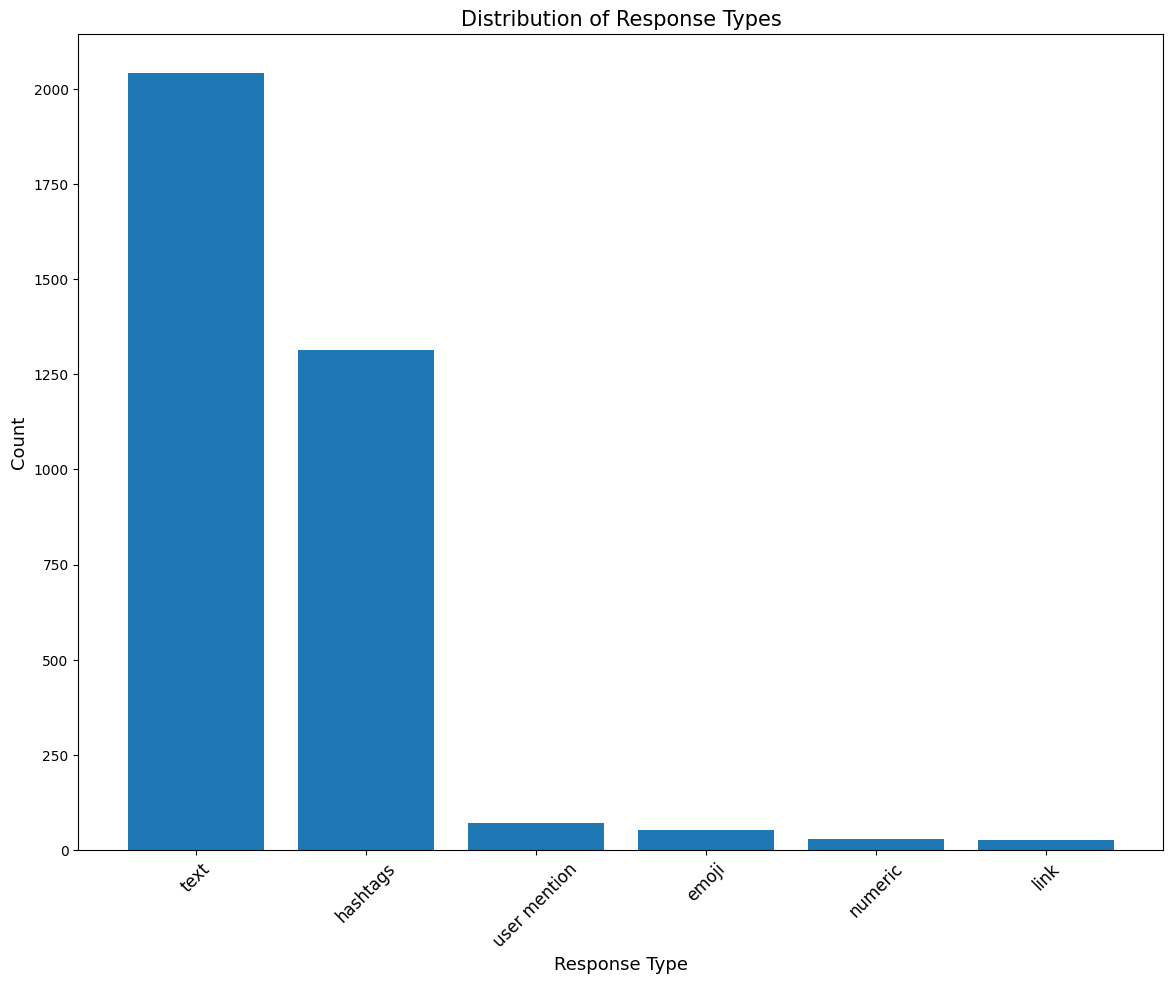

In [157]:
# Increase the figure size
plt.figure(figsize=(14, 12))  # Adjust the width and height as needed

# Create a bar plot
plt.bar(response_counts.index, response_counts.values)

# Add labels and title
plt.xlabel('Response Type', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Distribution of Response Types', fontsize = 15)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Increase fontsize for x-axis tick labels
plt.tick_params(axis='x', labelsize=12)  # Increase fontsize for x-axis tick labels

# Adjust the bottom margin to accommodate the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()


## Question 3: Is the writing prompt original content, or a reblog, or is it a submission?

In [145]:
reblog_counts = unique_writing_prompts['reblog'].value_counts()
reblog_counts

reblog
no     184
yes     26
Name: count, dtype: int64

In [146]:
submission_counts = unique_writing_prompts['submission'].value_counts()
submission_counts

submission
no    210
Name: count, dtype: int64

In [147]:
original_content_counts = unique_writing_prompts['original content'].value_counts()
original_content_counts

original content
yes    184
no      26
Name: count, dtype: int64

In [148]:
reblog_submission_original = unique_writing_prompts[['reblog', 'submission','original content']]

In [149]:
# Assuming you have obtained the counts using reblog_submission_original.value_counts()
counts = reblog_submission_original.stack().value_counts()
counts

no     420
yes    210
Name: count, dtype: int64

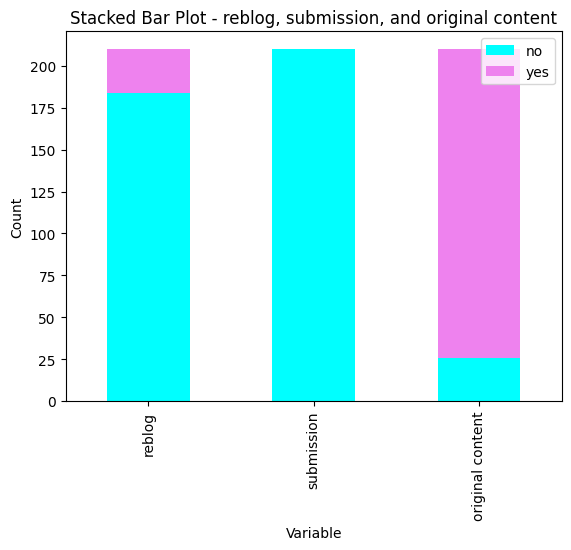

In [150]:
# Calculate the stacked counts across the columns
stacked_counts = reblog_submission_original.apply(pd.value_counts).fillna(0).transpose()

# Define a color palette for the stacked bars
colors = ['cyan', 'violet']

# Create the stacked bar plot with custom colors
stacked_counts.plot.bar(stacked=True, color=colors)

# Set the plot title and axis labels
plt.title('Stacked Bar Plot - reblog, submission, and original content')
plt.xlabel('Variable')
plt.ylabel('Count')

# Display the plot
plt.show()

## Question 4: Is there a structure to the posts, and if so, how?

In [151]:
structure = unique_writing_prompts['structure']
structure

0                                         <p></p>
1                                         <p></p>
2                                         <p></p>
3                                         <p></p>
4                                         <p></p>
                          ...                    
205    <p><h1>Writing Prompt #XXX</h1></p><p></p>
206                          self-reblog of wp248
207    <p><h1>Writing Prompt #XXX</h1></p><p></p>
208                          self-reblog of wp250
209           <h1>Writing Prompt #XXX</h1><p></p>
Name: structure, Length: 210, dtype: object

In [152]:
# Define the regex pattern to match 'self-reblog of wp' followed by any number
pattern = r'self-reblog of wp\d+'

# Function to replace the matched pattern with 'self-reblog of wpX'
def replace_pattern(text):
    return re.sub(pattern, 'self-reblog of wpXXX', text)

# Apply the replace_pattern function to the series
data = structure.apply(replace_pattern)

# Print the modified series
data


0                                         <p></p>
1                                         <p></p>
2                                         <p></p>
3                                         <p></p>
4                                         <p></p>
                          ...                    
205    <p><h1>Writing Prompt #XXX</h1></p><p></p>
206                          self-reblog of wpXXX
207    <p><h1>Writing Prompt #XXX</h1></p><p></p>
208                          self-reblog of wpXXX
209           <h1>Writing Prompt #XXX</h1><p></p>
Name: structure, Length: 210, dtype: object

In [155]:
pd.set_option('max_colwidth', 1000)


# Count the frequency of each type
structure_freq = data.value_counts()

# Create a DataFrame from the frequency data
structure_table = pd.DataFrame({'Structure Type': structure_freq.index, 'Frequency': structure_freq.values})

# Display the table
structure_table

,Structure Type,Frequency
0,<p></p>,104
1,<p>writing prompt #XXX</p><p></p>,36
2,self-reblog of wpXXX,24
3,<p><h1>Writing Prompt #XXX</h1></p><p></p>,18
4,<h1>Writing Prompt #XXX</h1><p></p>,6
5,<p>#XXX </p><p></p>,5
6,<p><h1>Prompt #XXX</h1></p><p></p>,2
7,<p><h1>Prompt #XXX</h1></p>,2
8,<p><h1>Prompt #XXX</h1><p></p></p>,2
9,<h1>title</h1><p></p><ul><li></li></ul>,1


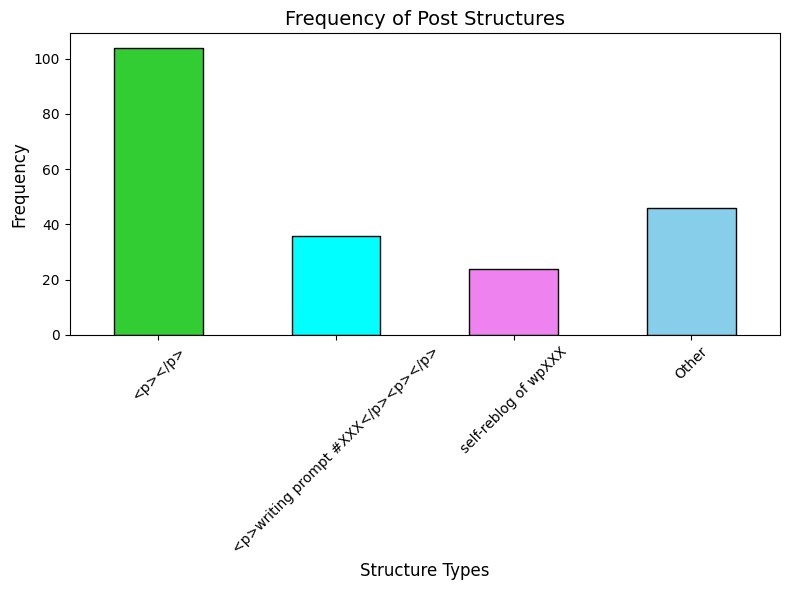

In [158]:
# Count the frequency of each type
structure_freq = data.value_counts()

# Set the threshold for including structure types
threshold = 3

# Determine the main structure types and "Other"
main_types = structure_freq.index[:threshold]
other_count = structure_freq[threshold:].sum()

# Create a modified frequency series
modified_freq = structure_freq[:threshold]
modified_freq['Other'] = other_count

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the plot
# Define a color palette for the stacked bars
colors = ['limegreen','cyan', 'violet', 'skyblue']# Set custom colors for bars
modified_freq.plot(kind='bar', color=colors, edgecolor='black')  # Set colors and edgecolor
plt.xlabel('Structure Types', fontsize=12)  # Set x-axis label and font size
plt.ylabel('Frequency', fontsize=12)  # Set y-axis label and font size
plt.title('Frequency of Post Structures', fontsize=14)  # Set title and font size
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

# Datasets so far

In [32]:
unique_writing_prompts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   blog_name           218 non-null    object
 1   title               218 non-null    object
 2   description         218 non-null    object
 3   post_url            218 non-null    object
 4   date (YYYY-MM-DD)   218 non-null    object
 5   hashtags            190 non-null    object
 6   short_url           218 non-null    object
 7   writing_prompt_id   218 non-null    object
 8   writing_prompt      218 non-null    object
 9   total_amount_notes  218 non-null    int64 
 10  response_id         218 non-null    object
 11  response            189 non-null    object
 12  blog_name_response  189 non-null    object
 13  type_of_response    189 non-null    object
 14  reblog_parent_name  107 non-null    object
 15  reblog              218 non-null    object
 16  submission          218 no

In [33]:
unique_writing_prompts.describe()

,total_amount_notes
count,218.000000
mean,1378.830275
std,2755.284070
min,2.000000
25%,39.750000
50%,155.500000
75%,556.250000
max,16398.000000


In [34]:
corpus_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   blog_name           2099 non-null   object
 1   title               2099 non-null   object
 2   description         2099 non-null   object
 3   post_url            2099 non-null   object
 4   date (YYYY-MM-DD)   2099 non-null   object
 5   hashtags            1781 non-null   object
 6   short_url           2099 non-null   object
 7   writing_prompt_id   2099 non-null   object
 8   writing_prompt      2099 non-null   object
 9   total_amount_notes  2099 non-null   int64 
 10  response_id         2099 non-null   object
 11  response            2069 non-null   object
 12  blog_name_response  2070 non-null   object
 13  type_of_response    2069 non-null   object
 14  reblog_parent_name  1515 non-null   object
 15  prompt_type         2099 non-null   object
 16  response_type       2099

In [35]:
corpus_analysis.describe()

,total_amount_notes
count,2099.000000
mean,2771.875179
std,3457.034610
min,2.000000
25%,215.000000
50%,816.000000
75%,4462.000000
max,16398.000000


# Saving the dataset


In [36]:
unique_writing_prompts.to_csv('unique_writing_prompts_after_layer_2.csv')

In [37]:
corpus_analysis.to_csv('corpus_analysis_after_layer_2.csv')